### Dear all,
The objective of this notebook is to shed some light on the question of *How good is my score in the Titanic competition?*
We all know the feeling of clicking on the '*Jump to your position on the leaderboard*', and we get a score of 0.7xxx (well, as least I do) then the next thing we do is scroll up and see all these 1.00000 results and we feel that 
we are doing something wrong. 

The first thing to say is that these *1.00000* submissions are cheating! Basically it works because the *hidden* data against which your submission is tested is actually [*public*](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic#Passenger_list) data, which can be found on Wikipedia, etc. (it is the *Titanic* after all). In other words, if you hand-craft the submission file you will score a 1, with no machine learning required; hardly any need for python or R code, no need for trying new methods and learning new techniques, etc. etc.

What is the point in doing that? **I really don't know...**

Ok, so, how good is my score? First we shall load in a snapshot of the leaderboard. This data can be downloaded directly from [the Titanic leaderboard page ](https://www.kaggle.com/c/3136/publicleaderboarddata.zip) where it says Raw Data.


In [1]:
#!/usr/bin/python3
# coding=utf-8
#===========================================================================
# load up the libraries
#===========================================================================
import pandas  as pd
import matplotlib.pyplot as plt

#===========================================================================
# read in the data 
# (2 month rolling leaderboard data, downloaded on the 3.V.2020)
#===========================================================================
titanic_lb = pd.read_csv('../input/titanic-publicleaderboarddata-4v2020/titanic-publicleaderboard.csv')

#===========================================================================
# make a frequency table
#===========================================================================
from collections import Counter
titanic_ft = Counter(titanic_lb["Score"])

Firstly, we shall make a frequency plot of the *whole* leaderboard to get an overall feeling for the data:

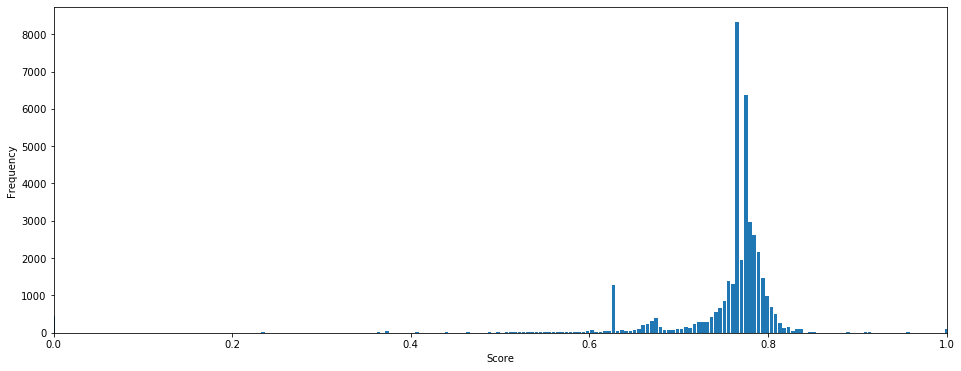

In [2]:
plt.figure(figsize=(16,6))
plt.xlabel  ("Score")
plt.ylabel  ("Frequency")
plt.xlim((0.0,1.0))
plt.bar(titanic_ft.keys(), titanic_ft.values(), width=0.004)
plt.show()

We can see that the majority of the scores lie between `0.6` and `0.85`, so we shall zoom in on that area:

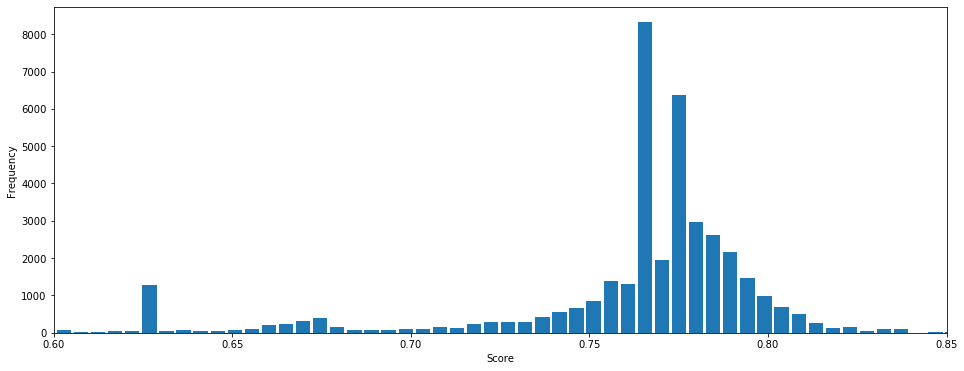

In [3]:
plt.figure(figsize=(16,6))
plt.xlabel  ("Score")
plt.ylabel  ("Frequency")
plt.xlim((0.6,0.85))
plt.bar(titanic_ft.keys(), titanic_ft.values(), width=0.004)
plt.show()

We can clearly see a distribution of scores, and in particular, three interesting peaks.
### The 0.76555 peak:
This is by far the highest peak and corresponds to correctly classifying 320 results. This peak is due to people submitting the default `gender_submission.csv` file provided by the competition. The submission of this file alone represents more than 20% of the results that are seen on the leaderboard. This is not entirely surprising, given that the excellent [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial) by Alexis Cook suggests doing this as an exercise.

In [4]:
# find the maximum value (i.e. most frequent score) 
# and its corresponding key
maximum = max(titanic_ft, key=titanic_ft.get)
# calculate the percentage of submissions that have this score
percentage_max_score = ((100/titanic_lb.shape[0])*titanic_ft[maximum])
print("Percentage of people with the most frequent score is:",
      str(round(percentage_max_score, 2)),"%")

Percentage of people with the most frequent score is: 20.52 %


### The 0.62679 peak: <font color='red'>(now 0.62200, see below for details)</font>
This peak corresponds to people submitting the [*'all dead'* submission file](https://www.kaggle.com/carlmcbrideellis/titanic-all-zeros-csv-file), in other words, in the submission file all `PassengerId` are assigned a zero, corresponding to no survivors. If we multiply `0.62200` by the number of entries in the file, `418`, shows us that the simple *all dead* file actually correctly guesses 260 data points. This in some way is a stark reminder of the tragedy that was the Titanic.
### The 0.77511 peak:
Most classifiers will give this result if very little feature engineering or hyperparameter tuning has been performed. The score corresponds to correctly classifying 324 passengers. For example, the script for the random forest model in the aforementioned *Titanic Tutorial* notebook, in conjunction with the parameters which were provided, returns this score of 0.77511.
### The 1.00000 peak:
This is a most disappointing peak, as we have mentioned earlier, it is the result of cheating.

We can make a count of the number of these unfair submissions, currently there are over 100 of them:

In [5]:
# print the number of 'perfect' solutions
print("Number of 'perfect' (1.00000) submissions is: %i" % titanic_ft[1.0])

Number of 'perfect' (1.00000) submissions is: 104


# So, how great is 0.8?
Now, to answer *How good is a score greater than 0.8?*

In [6]:
# sum the number of submissions with a score > 0.8
sum = 0
for key in titanic_ft:
    if key > 0.8:
        sum = sum + titanic_ft[key]
print("Number of submissions whose score is greater than 0.8 is:",sum)

Number of submissions whose score is greater than 0.8 is: 2302


we shall now remove the 'perfect' scores from our tally, as they are basically rubbish:

In [7]:
# take away the 1.00000 bin
number_gt_8_correct = sum - titanic_ft[1.0]
print("less those with a perfect 1.00000 is:", number_gt_8_correct)

less those with a perfect 1.00000 is: 2198


In [8]:
percentage_gt_eight = ((100/titanic_lb.shape[0])*number_gt_8_correct)
print("Submissions with a score greater than 0.8 are in the top", 
      str(round(percentage_gt_eight, 2)),"%")

Submissions with a score greater than 0.8 are in the top 5.42 %


#### Answer: a score > 0.8 is well within the top 6%, and more than good enough for a gold medal
### Now that is great!
#### PS: If you are wondering, a score of above 0.785 would sufficient land yourself a silver medal (\*)

### Honourable mention: A score of 0.00000
Occasionally people obtain a score of `0.00000` no matter what they do. This is *almost certainly* caused by submitting a `submission.csv` for which the `Survived` column is made up of floating point numbers (i.e. `0.0 and 1.0`) rather than integers (`0` and `1`). This can be easily remedied by simply passing them through `.astype(int)` before writing.

### **See also my notebook:** ["Titanic: In all the confusion..."](https://www.kaggle.com/carlmcbrideellis/titanic-in-all-the-confusion) which covers the meaning of:
* the **accuracy score**, 
* the **confusion matrix**, 
* the **$F_1$ score**, 
* the **ROC curve** and 
* the **AUC** (area under the curve)

using the Titanic data as an example.

(\*) Note: The data used in this notebook is taken from a snapshot of the 2 month rolling results, which are subject to change over time.
<br><br><font color='red'>**Note**: As of the 1st of July 2020 there is now only one unified leaderboard, calculated using *all* the data. This slightly changes some of the 'old' scores. See</font> ["Getting Started Competitions - 100% Public Leaderboard"](https://www.kaggle.com/c/titanic/discussion/163366) 
<font color='red'>for details.</font>. 